<center><u><H1>Recognizing Hand Written digits</H1></u></center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
%matplotlib inline

## Loading Data:

In [2]:
digits = load_digits()
print(digits.DESCR)

In [4]:
digits.data.shape

(1797, 64)

In [5]:
digits.target.shape

(1797,)

In [6]:
digits.images.shape

(1797, 8, 8)

## Visualizing the data:

In [7]:
img = list(zip(digits.images, digits.target))

In [8]:
img[100]

(array([[ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.],
        [ 0.,  0.,  5., 16.,  5.,  2.,  0.,  0.],
        [ 0.,  0., 15., 12.,  1., 16.,  4.,  0.],
        [ 0.,  4., 16.,  2.,  9., 16.,  8.,  0.],
        [ 0.,  0., 10., 14., 16., 16.,  4.,  0.],
        [ 0.,  0.,  0.,  0., 13.,  8.,  0.,  0.],
        [ 0.,  0.,  0.,  0., 13.,  6.,  0.,  0.]]), 4)

## Showing the images and their corresponding labels.

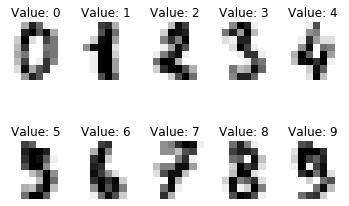

In [9]:
for i, (image, label) in enumerate(img[:10]):
    plt.subplot(2, 5, i + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Value: %i' % label)  

## Splitting and Stardardization of the data

In [10]:
X = digits.data
y = digits.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019)

In [12]:
sc = StandardScaler()

X_std = sc.fit_transform(X)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

## Training different classifiers: SVM, AdaBoost and MLP

In [14]:
svm_clf = SVC(kernel='rbf', gamma='scale', C=10)
dt = DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=2019)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=1000, learning_rate=0.1, random_state=2019)
mlp = MLPClassifier(activation='logistic', solver='sgd',learning_rate_init=0.2, alpha=0.5,
                    learning_rate='constant', hidden_layer_sizes=(200,),
                    max_iter=10000, random_state=2019)

In [15]:
svm_clf.fit(X_train_std, y_train)
ada.fit(X_train_std, y_train)
mlp.fit(X_train_std, y_train)

MLPClassifier(activation='logistic', alpha=0.5, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(200,), learning_rate='constant',
              learning_rate_init=0.2, max_iter=10000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=2019, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

## Making Predictions:

In [16]:
svm_pred = svm_clf.predict(X_test_std)
ada_pred = ada.predict(X_test_std)
mlp_pred = mlp.predict(X_test_std)

## Performing Metrics:

In [17]:
print("Accuracy score SVM:", accuracy_score(y_test, svm_pred))
print("Accuracy score AdaBoost:", accuracy_score(y_test, ada_pred))
print("Accuracy score MLP:", accuracy_score(y_test, mlp_pred))

Accuracy score SVM: 0.9777777777777777
Accuracy score AdaBoost: 0.9388888888888889
Accuracy score MLP: 0.9703703703703703


## Evaluation of Multilayer Perceptron Model

In [18]:
print("Confusion matrix:\n%s" % (confusion_matrix(y_test, mlp_pred)))

Confusion matrix:
[[56  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  1  0]
 [ 0  1 49  0  0  0  0  0  0  0]
 [ 0  0  0 60  0  0  0  0  2  0]
 [ 0  0  0  0 52  0  0  0  0  0]
 [ 0  0  0  0  0 52  0  0  0  3]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  1]
 [ 0  2  0  0  0  2  0  0 47  1]
 [ 0  0  0  0  0  0  0  1  2 57]]


In [19]:
scores = cross_val_score(mlp, X_std, y, cv=10)
print(f"Cross Val Scores:{scores}")

Cross Val Scores:[0.87027027 0.96721311 0.93922652 0.9        0.91061453 0.98324022
 0.96089385 0.9494382  0.87570621 0.94318182]


In [20]:
print(f"Cross Val Scores Mean:{scores.mean()} / Cross Val Scores Std:{scores.std()}")

Cross Val Scores Mean:0.9299784742831614 / Cross Val Scores Std:0.03688054771909021


## Showing the first 20 images in the test dataset with their predictions

In [21]:
X_test[:1]

array([[ 0.,  0.,  7., 15., 16., 16.,  1.,  0.,  0.,  9., 16., 16., 10.,
         5.,  0.,  0.,  0., 14., 16., 16., 15.,  0.,  0.,  0.,  0., 11.,
        14., 13., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  1.,  0.,
         0.,  0.,  0.,  0., 12., 12.,  0.,  0.,  0.,  0.,  0.,  6., 16.,
         7.,  0.,  0.,  0.,  0.,  0., 10., 13.,  0.,  0.,  0.,  0.]])

In [22]:
X_test[:1].reshape(-1, 8, 8)

array([[[ 0.,  0.,  7., 15., 16., 16.,  1.,  0.],
        [ 0.,  9., 16., 16., 10.,  5.,  0.,  0.],
        [ 0., 14., 16., 16., 15.,  0.,  0.,  0.],
        [ 0., 11., 14., 13., 16.,  2.,  0.,  0.],
        [ 0.,  0.,  0.,  6., 16.,  1.,  0.,  0.],
        [ 0.,  0.,  0., 12., 12.,  0.,  0.,  0.],
        [ 0.,  0.,  6., 16.,  7.,  0.,  0.,  0.],
        [ 0.,  0., 10., 13.,  0.,  0.,  0.,  0.]]])

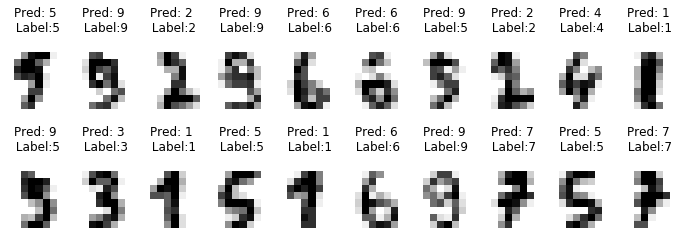

In [23]:
plt.figure(figsize=(12,4))
img_pred = list(zip(X_test.reshape(-1,8,8), mlp_pred, y_test))
for idx, (image, prediction, label) in enumerate(img_pred[:20]):
    plt.subplot(2, 10, idx + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Pred: {}\n Label:{}\n'.format(prediction,label))

## Showing misclassified numbers:

In [24]:
misclassifiedIndexes = []
for idx, (label, predict) in enumerate(list(zip(y_test, mlp_pred))):
    if label != predict: 
        misclassifiedIndexes.append(idx)
print(misclassifiedIndexes)

[6, 10, 32, 37, 54, 69, 99, 100, 158, 218, 288, 361, 367, 433, 531, 535]


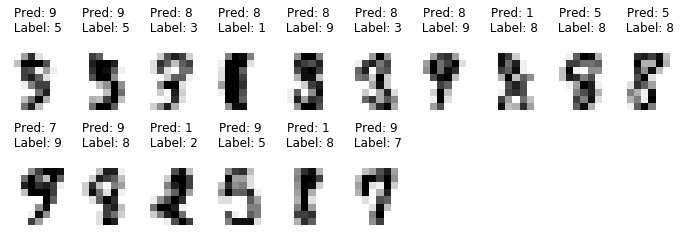

In [25]:
plt.figure(figsize=(12,6))
for idx, badIndex in enumerate(misclassifiedIndexes):
    plt.subplot(3, 10, idx + 1)
    plt.axis('off')
    plt.imshow(img_pred[badIndex][0], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Pred: {}\n Label: {}\n".format(mlp_pred[badIndex], y_test[badIndex]))

## Reference:
### http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html